In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [0]:
!pip install -U -q kaggle
!mkdir ~/.kaggle

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"veb101","key":"cd3197dd70445b3a6bf3e51fac263e73"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d datamunge/sign-language-mnist

 91% 57.0M/62.6M [00:01<00:00, 32.4MB/s]
100% 62.6M/62.6M [00:01<00:00, 46.3MB/s]


In [0]:
from zipfile import ZipFile

zip_file = ZipFile('/content/sign-language-mnist.zip', 'r')
zip_file.extractall('/content/sign-language-mnist')
zip_file.close()


In [0]:
from shutil import rmtree
from shutil import copyfile

copyfile('/content/sign-language-mnist/sign_mnist_train.csv', '/content/sign_mnist_train.csv')
copyfile('/content/sign-language-mnist/sign_mnist_test.csv', '/content/sign_mnist_test.csv')

rmtree('sign-language-mnist')

In [0]:
# uploaded=files.upload()

In [10]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images, temp_labels = [], []
        for row in csv_reader:
            if first_line:
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [0]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1./255
    )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

In [13]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)
])

# Compile Model. 
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )


# Train the Model
history = model.fit_generator(
    train_datagen.flow(training_images, training_labels, batch_size=32),
    epochs=15,
    validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
    validation_steps=len(testing_images) / 32
)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
# [6.92426086682151, 0.56609035]


Epoch 1/15
858/858 [==============================] - 16s 18ms/step - loss: 2.7424 - acc: 0.1701 - val_loss: 1.8724 - val_acc: 0.3925
Epoch 2/15
858/858 [==============================] - 15s 17ms/step - loss: 2.0151 - acc: 0.3655 - val_loss: 1.3123 - val_acc: 0.5910
Epoch 3/15
858/858 [==============================] - 15s 17ms/step - loss: 1.6061 - acc: 0.4798 - val_loss: 0.9711 - val_acc: 0.6813
Epoch 4/15
858/858 [==============================] - 15s 17ms/step - loss: 1.3812 - acc: 0.5490 - val_loss: 0.9172 - val_acc: 0.6665
Epoch 5/15
858/858 [==============================] - 15s 17ms/step - loss: 1.2313 - acc: 0.5984 - val_loss: 0.7782 - val_acc: 0.7292
Epoch 6/15
858/858 [==============================] - 15s 18ms/step - loss: 1.1016 - acc: 0.6395 - val_loss: 0.6389 - val_acc: 0.7784
Epoch 7/15
858/858 [==============================] - 15s 18ms/step - loss: 1.0289 - acc: 0.6612 - val_loss: 0.5850 - val_acc: 0.7934
Epoch 8/15
858/858 [==============================] - 15s 18ms

[140.99982753228159, 0.6908812]

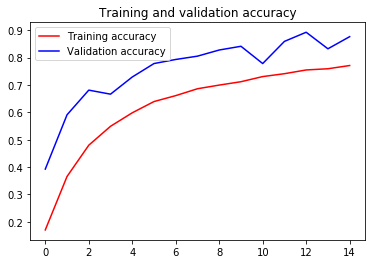

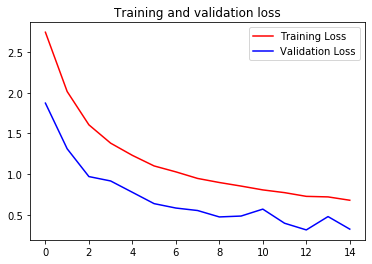

In [14]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()